<div style="text-align: center;">

  <h1 style="background-color:purple; color:white;">FIFA WORLD CUP ANALYSIS</h1>

</div>


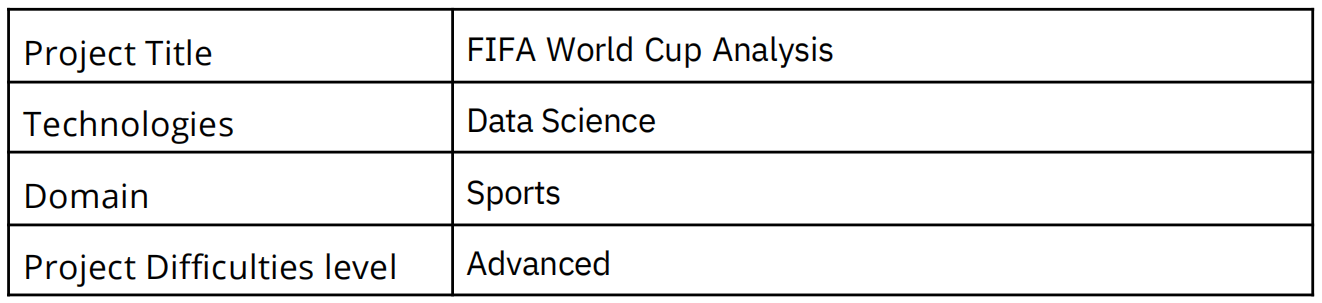

`Problem Statement:`With FIFA is in the blood of many people of the world. You are tasked to tell the story of unsung
analysts who put great efforts to provide accurate data to answer every question of fans. The
FIFA World Cup is a global football competition contested by the various football-playing
nations of the world. It is contested every four years and is the most prestigious and important
trophy in the sport of football.
The World Cups dataset shows all information about all the World Cups in history, while the
World Cup Matches dataset shows all the results from the matches contested as part of the
cups. Find key metrics and factors that influence the World Cup win.

Import required libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
import warnings

warnings.filterwarnings("ignore")
sns.set(color_codes=True)
%matplotlib inline

In [3]:
# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

<h3 style="color:navy"> Load the datasets</h3>

In [4]:
matches= pd.read_csv("C:/Users/tirum/Downloads/FIFA WC data/WorldCupMatches.csv")

In [5]:
players = pd.read_csv("C:/Users/tirum/Downloads/FIFA WC data/WorldCupPlayers.csv")

In [6]:
worldcups = pd.read_csv("C:/Users/tirum/Downloads/FIFA WC data/WorldCups.csv")

<h3 style="color:navy"> Get first few rows of the datasets</h3>

In [7]:
print("Matches Dataset:")
matches.head()

Matches Dataset:


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


1. **Year**: The year in which the match was played.
2. **Datetime**: The date and time when the match took place.
3. **Stage**:  The stage of the tournament (e.g., Group Stage, Quarter-finals, etc.).
4. **Stadium**: The name of the stadium where the match was held.
5. **City**:The city where the stadium is located.
6. **Home Team Name**: The name of the home team.
7. **Home Team Goals**: The number of goals scored by the home team.
8. **Away Team Goals**: The number of goals scored by the away team.
9. **Away Team Name**: The name of the away team.
10. **Win conditions**: Any special conditions for winning, such as penalties.
11. **Attendance**: The number of spectators attending the match.
12. **Half-time Home Goals**: Goals scored by the home team by halftime.
13. **Half-time Away Goals**: Goals scored by the away team by halftime.
14. **Referee**:  The name of the referee officiating the match.
15. **Assistant 1**: The first assistant referee.
16. **Assistant 2**:The second assistant referee.
17. **RoundID**: The ID of the round in the tournament.
18. **MatchID**: The ID of the specific match.
19. **Home Team Initials**: The initials of the home team.
20. **Away Team Initials**: The initials of the away team.

In [8]:
print("\nPlayers Dataset:")
players.head()


Players Dataset:


,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [9]:
print("\nWorld Cups Dataset:")
worldcups.head()


World Cups Dataset:


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [10]:
matches.shape

(4572, 20)

In [11]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

<h3 style="color:navy"> Check for missing values to handle</h3>

In [12]:
# Missing values in Matches dataset
missing_values = matches.isnull().sum()
print(missing_values[missing_values > 0])

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64


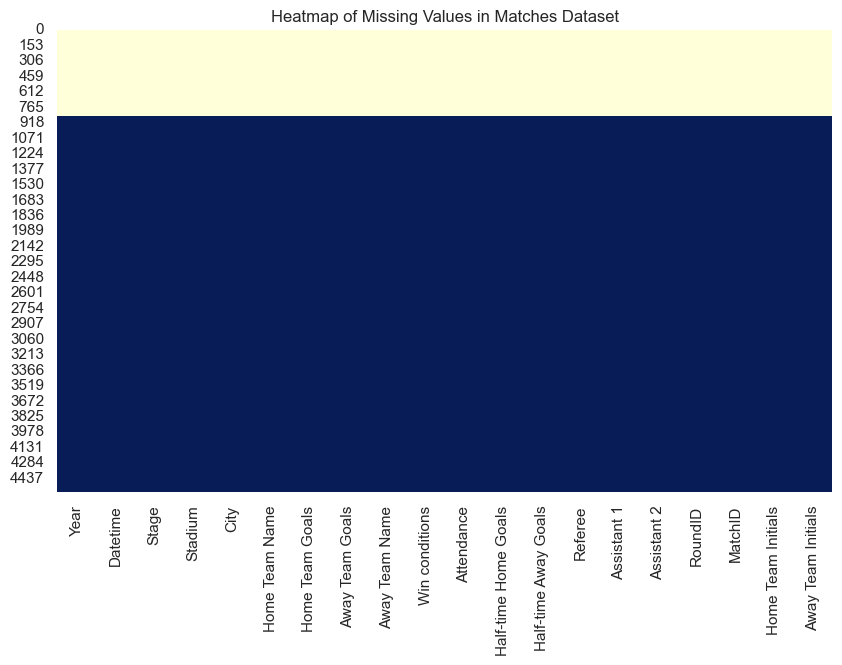

In [13]:
# Visualize missing data
sns.heatmap(matches.isnull(), cbar=False, cmap="YlGnBu")
plt.title('Heatmap of Missing Values in Matches Dataset')
plt.show()

In [14]:
# Dropping rows with missing 'Year' values
matches.dropna(subset=['Year'], inplace=True)

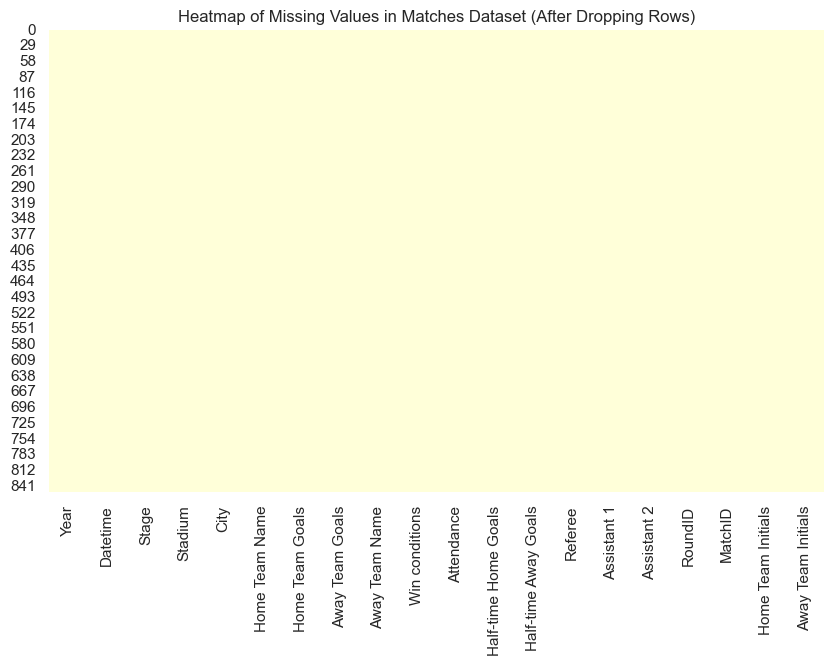

In [15]:
# Heatmap for missing data after dropping rows
sns.heatmap(matches.isnull(), cbar=False, cmap="YlGnBu")
plt.title('Heatmap of Missing Values in Matches Dataset (After Dropping Rows)')
plt.show()

In [16]:
# Basic statistics for goal data
print("\nHome Team Goals Statistics: \n")
print(matches['Home Team Goals'].describe())


Home Team Goals Statistics: 

count    852.000000
mean       1.811033
std        1.610255
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: Home Team Goals, dtype: float64


In [17]:
print("\nAway Team Goals Statistics: \n")
print(matches['Away Team Goals'].describe())


Away Team Goals Statistics: 

count    852.000000
mean       1.022300
std        1.087573
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        7.000000
Name: Away Team Goals, dtype: float64


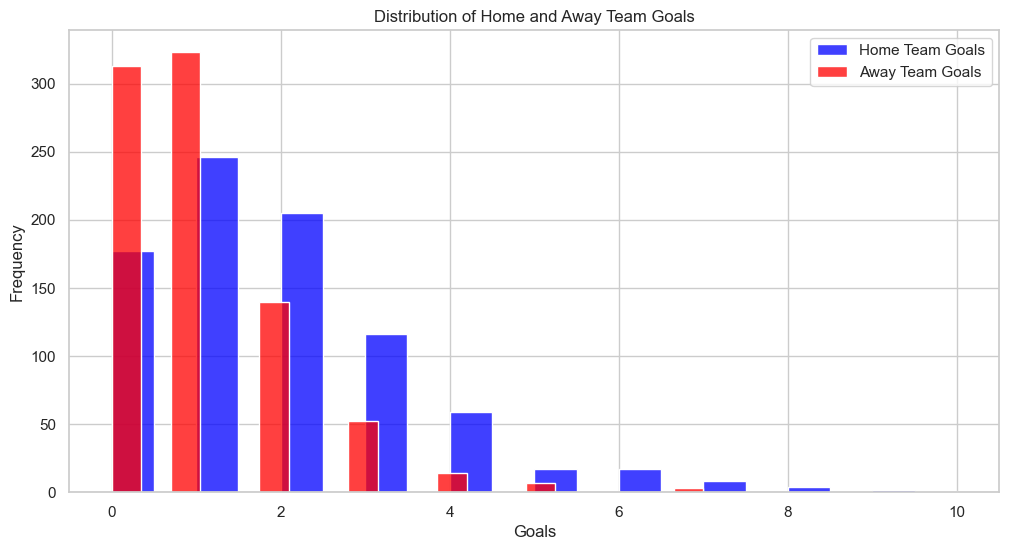

In [18]:
# Distribution of Home and Away Team Goals
plt.figure(figsize=(12, 6))
sns.histplot(matches['Home Team Goals'], color='blue', label='Home Team Goals', bins=20)
sns.histplot(matches['Away Team Goals'], color='red', label='Away Team Goals', bins=20)
plt.title('Distribution of Home and Away Team Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()


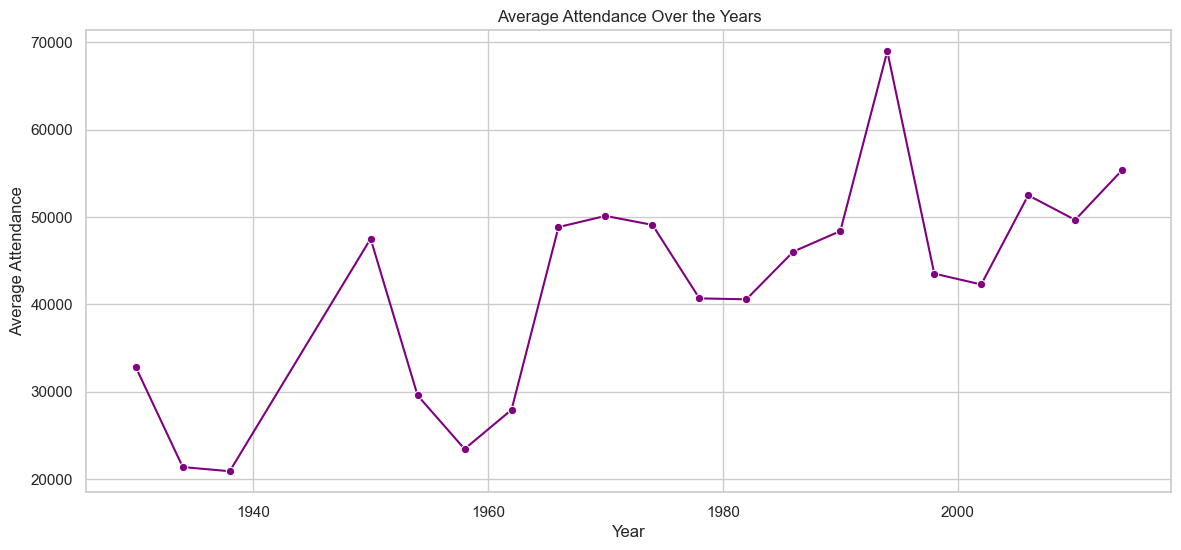

In [19]:
# Average attendance over the years
plt.figure(figsize=(14, 6))
attendance_per_year = matches.groupby('Year')['Attendance'].mean().reset_index()
sns.lineplot(data=attendance_per_year, x='Year', y='Attendance', marker='o', color='purple')
plt.title('Average Attendance Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.grid(True)
plt.show()

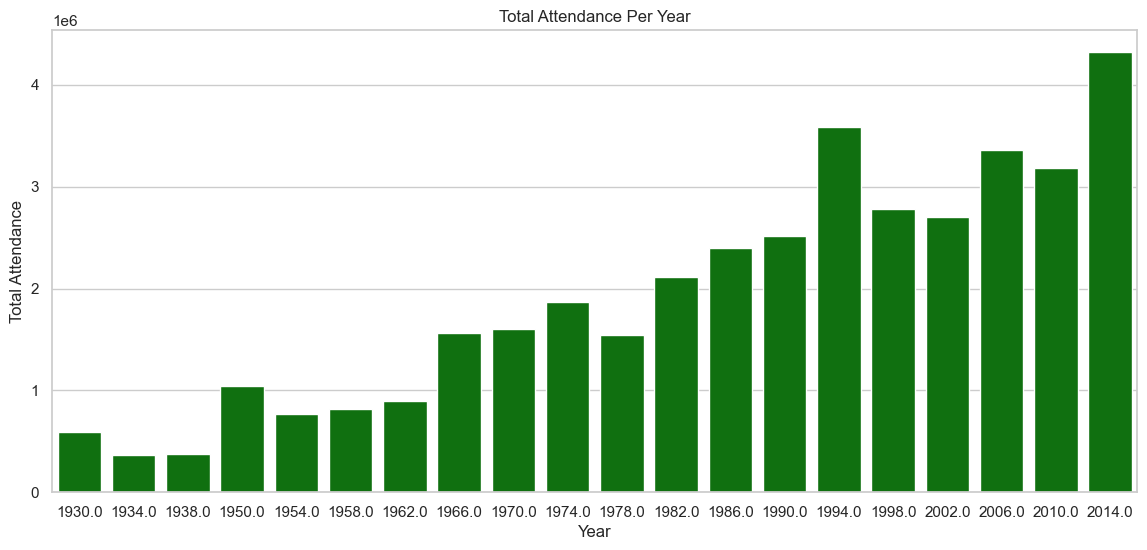

In [20]:
# Total attendance per year
plt.figure(figsize=(14, 6))
attendance_per_year = matches.groupby('Year')['Attendance'].sum().reset_index()
sns.barplot(data=attendance_per_year, x='Year', y='Attendance', color='green')
plt.title('Total Attendance Per Year')
plt.xlabel('Year')
plt.ylabel('Total Attendance')
plt.show()

In [21]:
# Average goals per team
home_goals = matches.groupby('Home Team Name')['Home Team Goals'].mean()
away_goals = matches.groupby('Away Team Name')['Away Team Goals'].mean()


In [22]:
total_goals = home_goals.add(away_goals, fill_value=0).sort_values(ascending=False)
print("\nTop 5 Teams by Average Goals:")
total_goals[0:5]


Top 5 Teams by Average Goals:


Turkey        6.250000
Hungary       5.055556
Germany       4.529412
Germany FR    3.986536
Brazil        3.925891
dtype: float64

In [23]:
# Home Advantage Analysis
matches['Home Advantage'] = matches['Home Team Goals'] > matches['Away Team Goals']
home_advantage_rate = matches['Home Advantage'].mean()
print(f"\nHome Advantage Rate: {home_advantage_rate:.2%}")


Home Advantage Rate: 57.28%


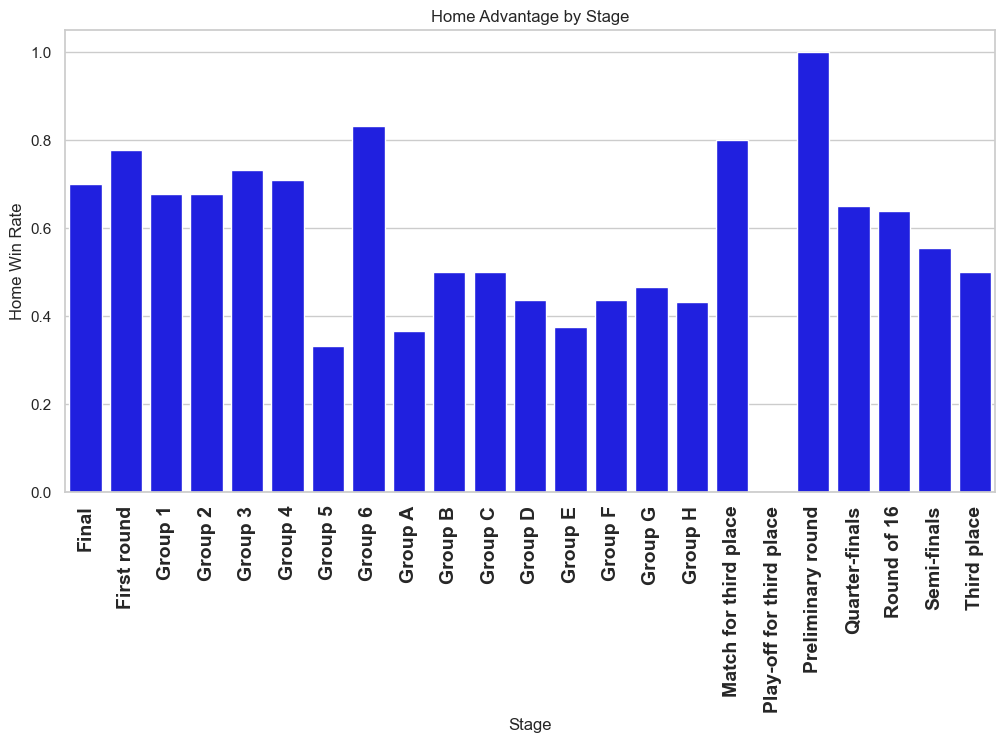

In [24]:
# Home Advantage by Stage
plt.figure(figsize=(12, 6))
home_advantage_by_stage = matches.groupby('Stage')['Home Advantage'].mean().reset_index()
sns.barplot(data=home_advantage_by_stage, x='Stage', y='Home Advantage', color='blue')
plt.title('Home Advantage by Stage')
plt.xlabel('Stage')
plt.ylabel('Home Win Rate')
plt.xticks(rotation=90, fontweight='bold', fontsize=14)
plt.show()

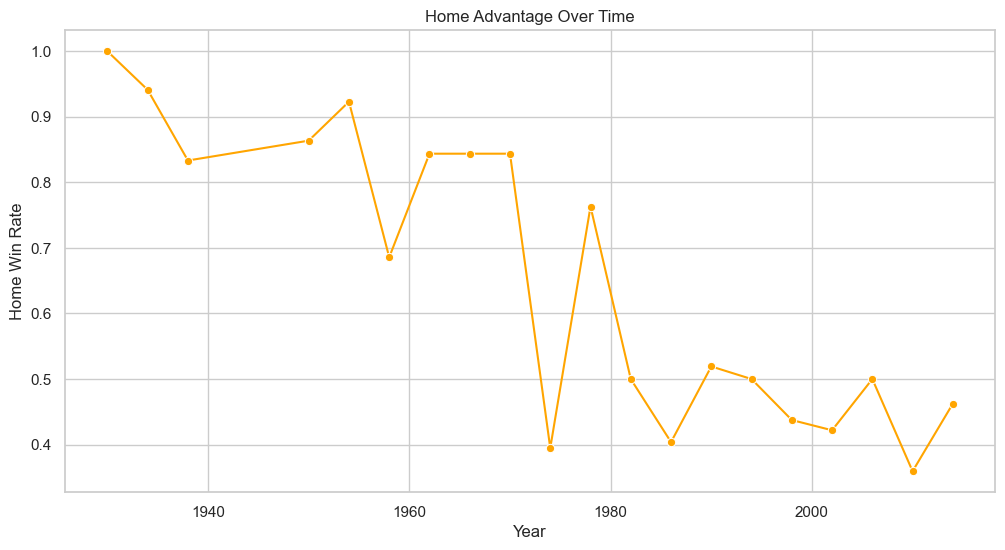

In [25]:
# Home Advantage Over Time
plt.figure(figsize=(12, 6))
home_adv_over_time = matches.groupby('Year')['Home Advantage'].mean().reset_index()
sns.lineplot(data=home_adv_over_time, x='Year', y='Home Advantage', marker='o', color='orange')
plt.title('Home Advantage Over Time')
plt.xlabel('Year')
plt.ylabel('Home Win Rate')
plt.show()

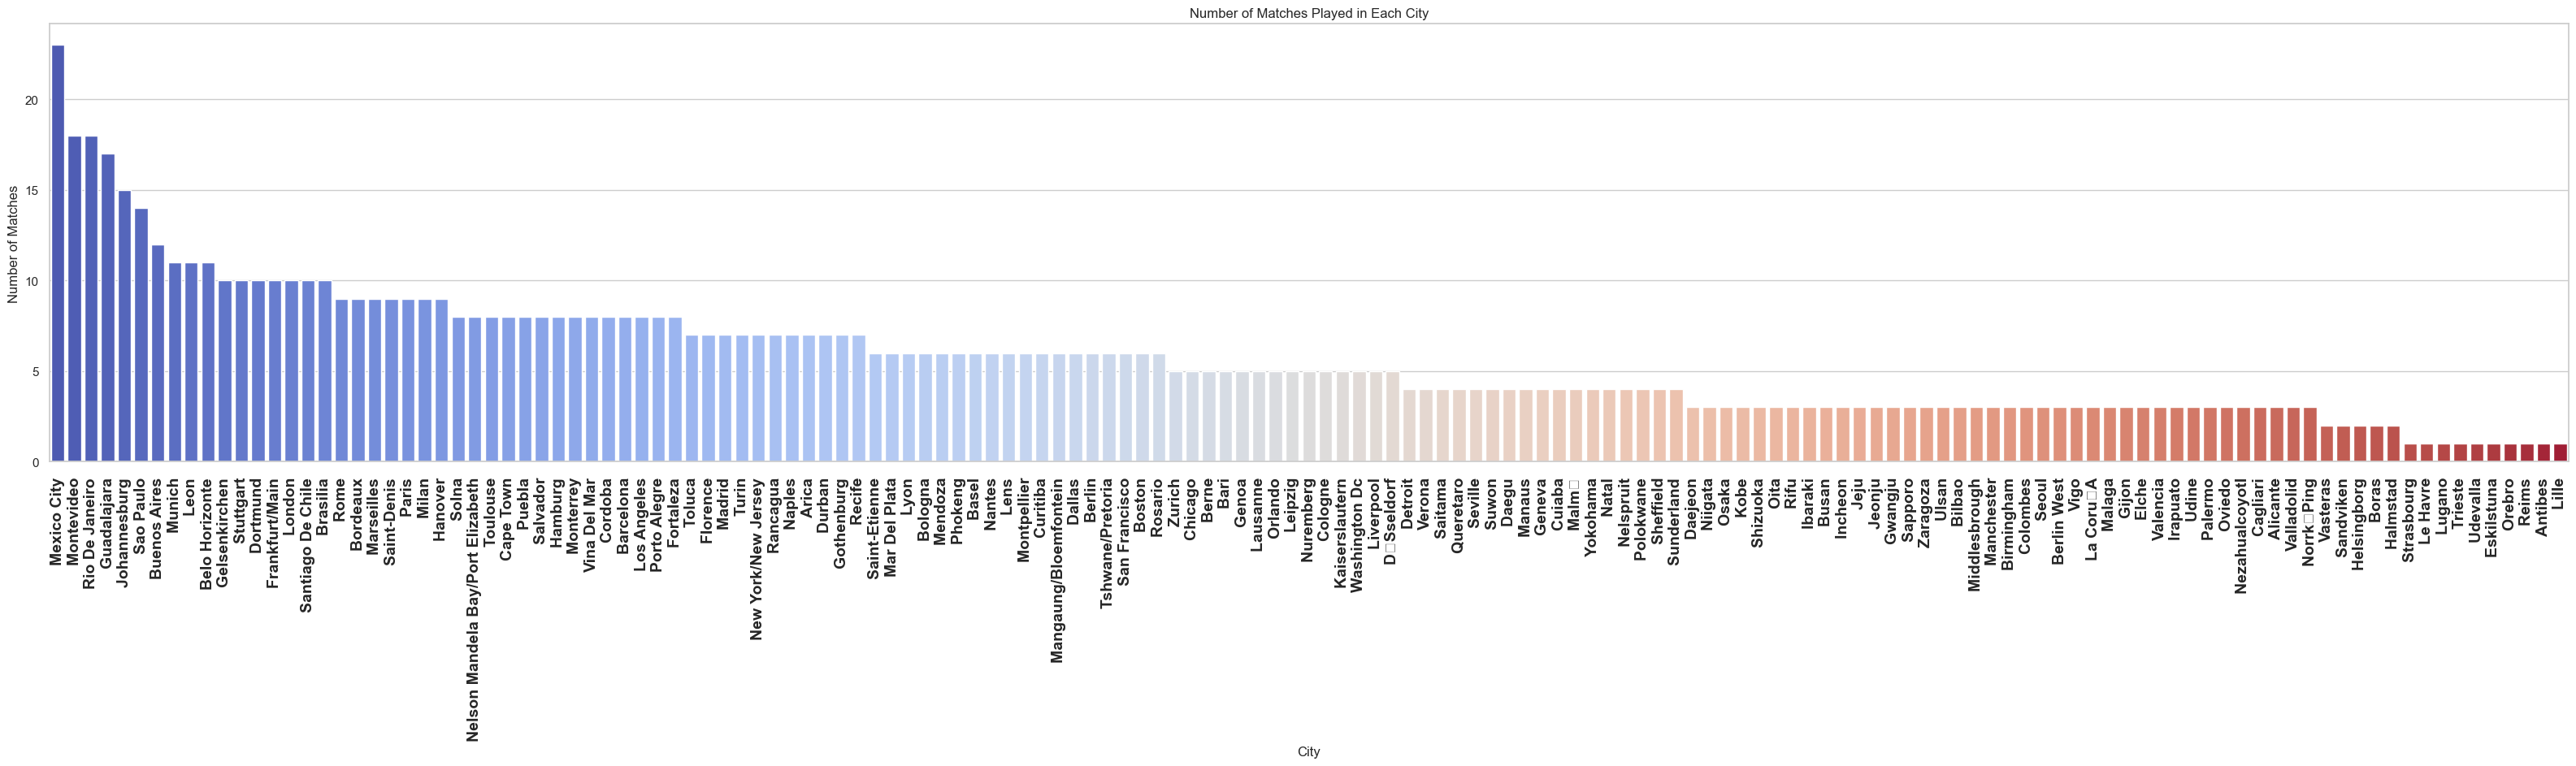

In [26]:
# City and Venue Analysis
plt.figure(figsize=(40, 7))
num_of_cities = matches['City'].value_counts()
sns.barplot(x=num_of_cities.index, y=num_of_cities.values, palette='coolwarm')
plt.title('Number of Matches Played in Each City')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90, fontweight='bold', fontsize=14)
plt.show()

In [27]:
# Venue performance
venue_performance = matches.groupby('Stadium')['Home Advantage'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Venues by Home Advantage Rate:")
print(venue_performance)


Top 10 Venues by Home Advantage Rate:
Stadium
Pocitos                                      1.0
Giorgio Ascarelli                            1.0
Estadio Irapuato                             1.0
Wankdorf Stadium                             1.0
Nazionale PNF                                1.0
Eucaliptos                                   1.0
Eyravallen                                   1.0
Rimnersvallen                                1.0
Fort Carree                                  1.0
Maracan� - Est�dio Jornalista M�rio Filho    1.0
Name: Home Advantage, dtype: float64


In [28]:
# Overall Goal Analysis
total_goals_country = home_goals.add(away_goals, fill_value=0).sort_values(ascending=False)
print("\nTotal Goals per Country:")
print(total_goals_country)


Total Goals per Country:
Turkey                     6.250000
Hungary                    5.055556
Germany                    4.529412
Germany FR                 3.986536
Brazil                     3.925891
                             ...   
Dutch East Indies          0.000000
China PR                   0.000000
Canada                     0.000000
Zaire                      0.000000
rn">Trinidad and Tobago    0.000000
Length: 83, dtype: float64


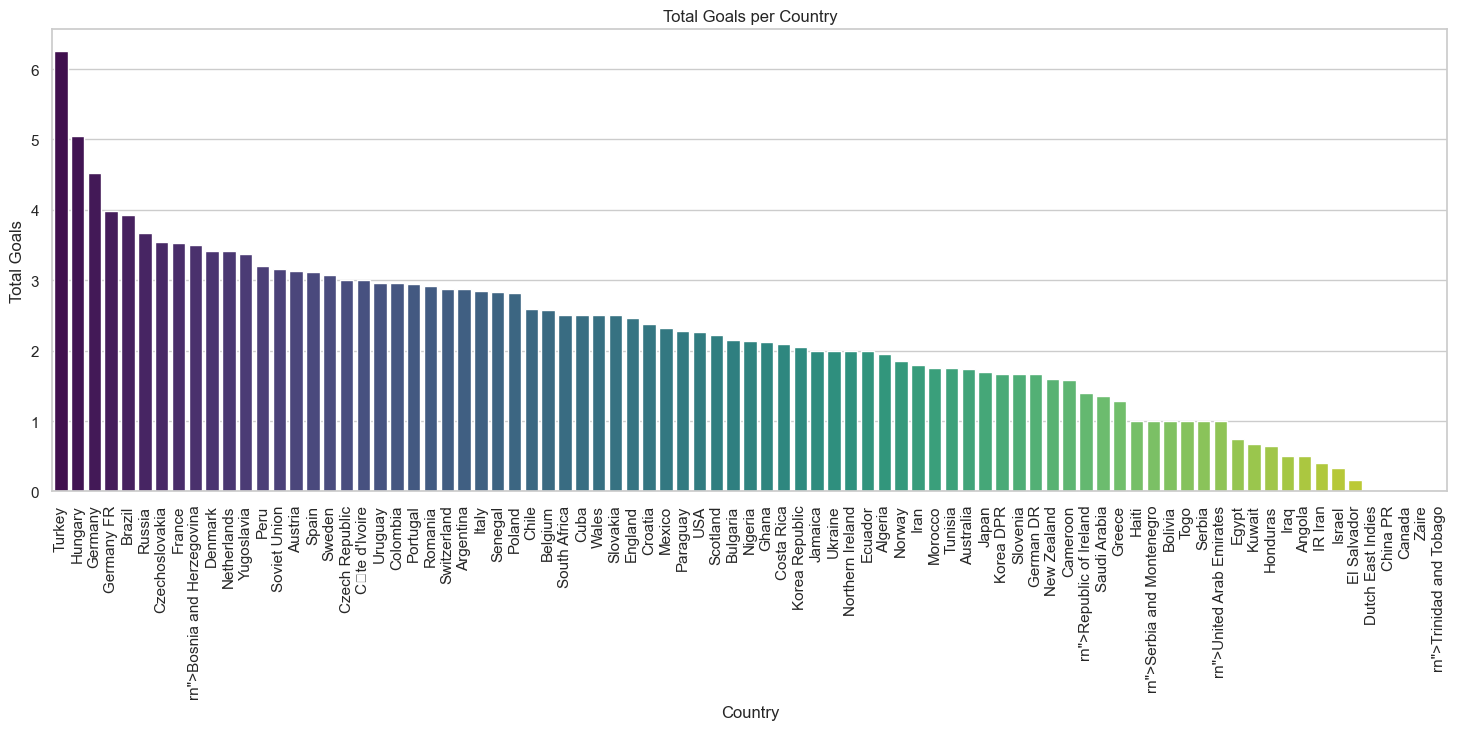

In [29]:
plt.figure(figsize=(18, 6))
sns.barplot(x=total_goals_country.index, y=total_goals_country.values, palette='viridis')
plt.title('Total Goals per Country')
plt.xlabel('Country')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)
plt.show()

In [30]:
# Match Outcomes Analysis
matches['Match Outcome'] = matches.apply(lambda row: 'Home Win' if row['Home Team Goals'] > row['Away Team Goals'] else ('Away Win' if row['Home Team Goals'] < row['Away Team Goals'] else 'Draw'), axis=1)
match_outcomes = matches['Match Outcome'].value_counts()
print("\nMatch Outcomes:")
print(match_outcomes)


Match Outcomes:
Match Outcome
Home Win    488
Draw        190
Away Win    174
Name: count, dtype: int64


In [31]:
# Correlation between Attendance and Goals
correlation_attendance_goals = matches[['Attendance', 'Home Team Goals', 'Away Team Goals']].corr()
print("\nCorrelation between Attendance and Goals:")
print(correlation_attendance_goals)


Correlation between Attendance and Goals:
                 Attendance  Home Team Goals  Away Team Goals
Attendance         1.000000        -0.117751        -0.029801
Home Team Goals   -0.117751         1.000000         0.012474
Away Team Goals   -0.029801         0.012474         1.000000


In [32]:
# Impact of Referees on Match Outcomes
referee_performance = matches.groupby('Referee')['Match Outcome'].value_counts(normalize=True).unstack().fillna(0)
top_referees = referee_performance.sum(axis=1).sort_values(ascending=False).head(10)


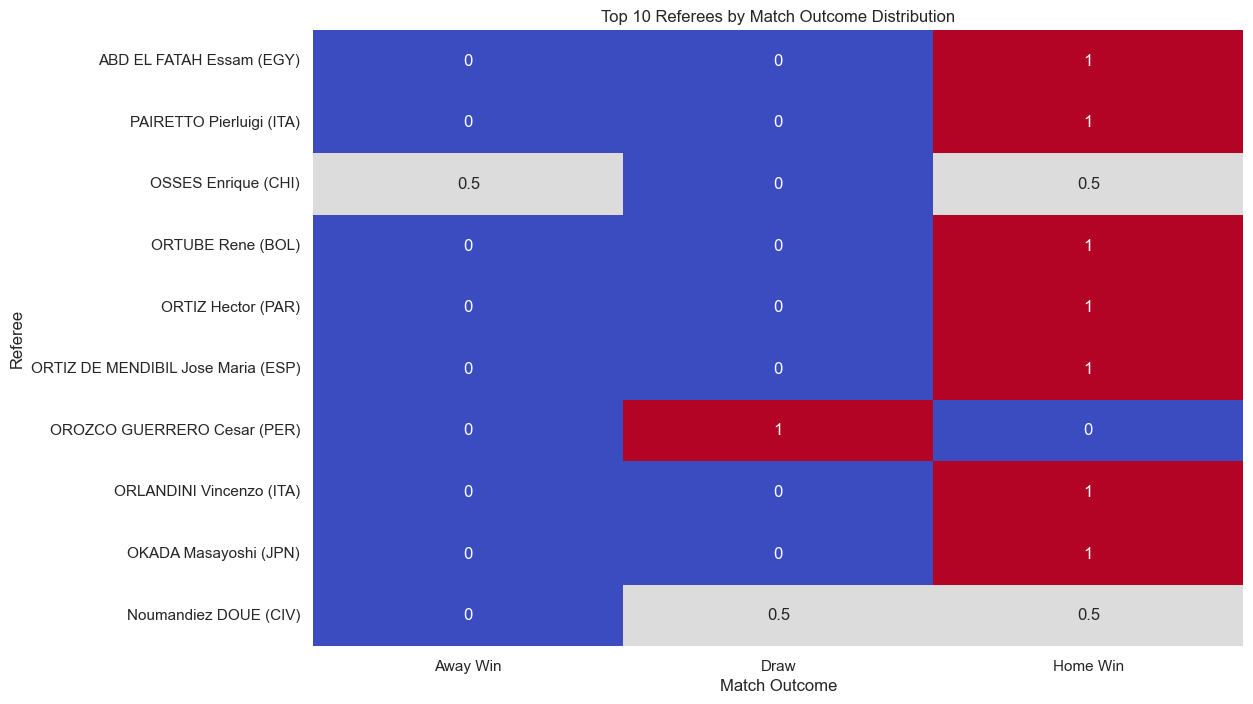

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(referee_performance.loc[top_referees.index], annot=True, cmap='coolwarm', cbar=False)
plt.title('Top 10 Referees by Match Outcome Distribution')
plt.xlabel('Match Outcome')
plt.ylabel('Referee')
plt.show()

In [34]:
# Find Maximum Number of World Cup Winning Titles

# Filter for finals
finals = matches[matches['Stage'] == 'Final']

In [35]:
# Determine the winners of each final 
finals['Winner'] = finals.apply(lambda row: row['Home Team Name'] if row['Home Team Goals'] > row['Away Team Goals'] else row['Away Team Name'], axis=1)

In [36]:
win_counts = finals['Winner'].value_counts()

print("Maximum Number of World Cup Winning Titles: \n")
print(win_counts)

Maximum Number of World Cup Winning Titles: 

Winner
Italy         4
Brazil        4
Germany FR    3
Argentina     2
France        2
Germany       2
Uruguay       1
England       1
Spain         1
Name: count, dtype: int64


In [37]:
# determine which team has scored the most goals overall in every World Cup:
home_goals = matches.groupby('Home Team Name')['Home Team Goals'].sum()

In [38]:
away_goals = matches.groupby('Away Team Name')['Away Team Goals'].sum()

In [39]:
# Combine home and away goals for each country
total_goals = home_goals.add(away_goals, fill_value=0).sort_values(ascending=False)
print("Maximum goals:",max(total_goals))
print("\nTotal Goals per Country:")
print("________________________")
print(total_goals.head())

Maximum goals: 225.0

Total Goals per Country:
________________________
Brazil        225.0
Argentina     133.0
Germany FR    131.0
Italy         128.0
France        108.0
dtype: float64


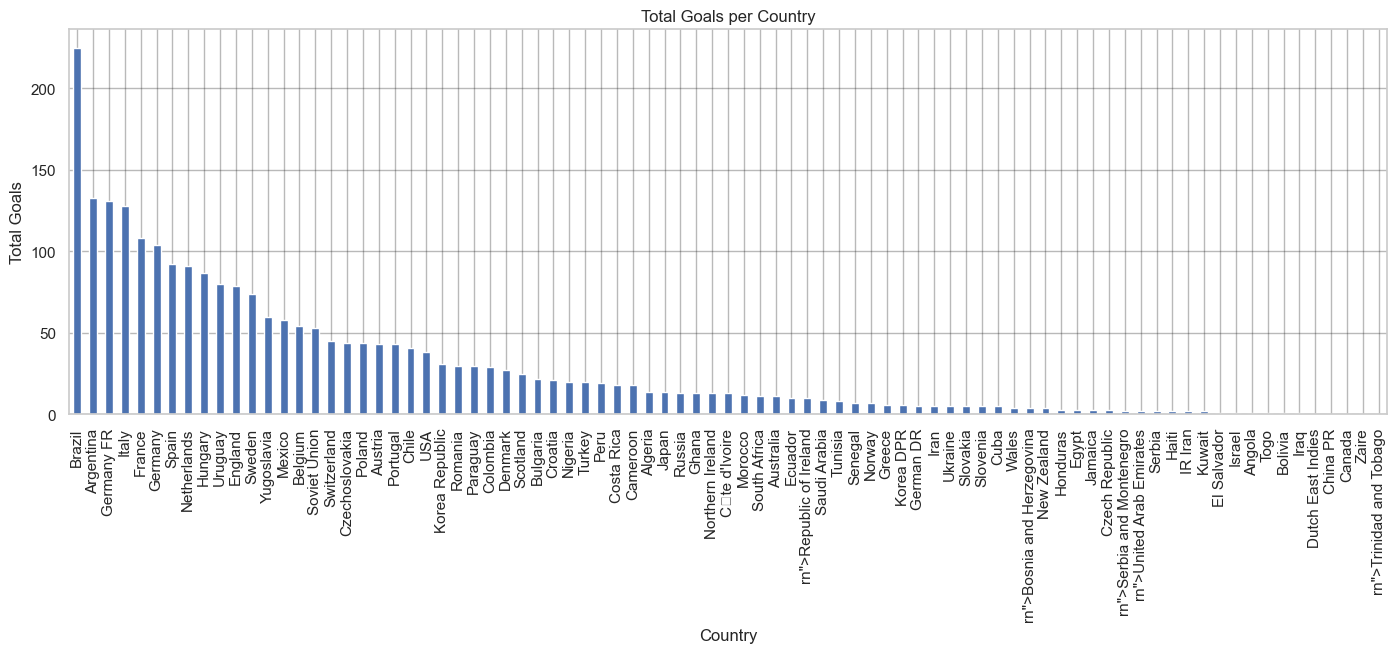

In [40]:
# Total Goals per Country
total_goals_sorted = total_goals.sort_values(ascending=False)

plt.figure(figsize=(17,5))
total_goals_sorted.plot(kind='bar', title='Total Goals per Country')
plt.xlabel('Country')
plt.ylabel('Total Goals')
plt.grid(True, color='k',alpha=0.3)
plt.show()


In [41]:
#  calculate match outcomes (win, loss, draw) for both home and away teams
def determine_outcome(row):
    if row['Home Team Goals'] > row['Away Team Goals']:
        return 'Home Win'
    elif row['Home Team Goals'] < row['Away Team Goals']:
        return 'Away Win'
    else:
        return 'Draw'

In [42]:
matches['Match Outcome'] = matches.apply(determine_outcome, axis=1)

# Aggregate outcomes for home teams
home_outcomes = matches['Match Outcome'].value_counts()
print("Match Outcomes by Home and Away Teams:")
print("____________________________________")
print(home_outcomes)

Match Outcomes by Home and Away Teams:
____________________________________
Match Outcome
Home Win    488
Draw        190
Away Win    174
Name: count, dtype: int64


In [43]:
# Defining the match outcomes
matches['Home Win'] = matches['Home Team Goals'] > matches['Away Team Goals']
matches['Away Win'] = matches['Home Team Goals'] < matches['Away Team Goals']
matches['Draw'] = matches['Home Team Goals'] == matches['Away Team Goals']

In [44]:
outcomes = {
    'Home Wins': matches['Home Win'].sum(),
    'Away Wins': matches['Away Win'].sum(),
    'Draws': matches['Draw'].sum()
}


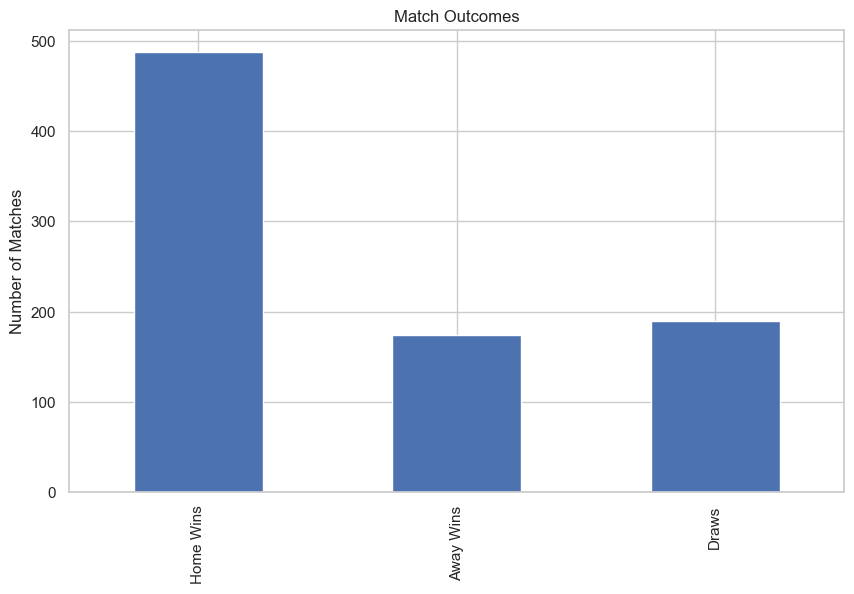

In [45]:

pd.Series(outcomes).plot(kind='bar', title='Match Outcomes')
plt.ylabel('Number of Matches')
plt.show()


In [46]:
# Counting wins, losses, draws for both home and away teams
home_outcomes = {
    'Wins': matches['Home Win'].sum(),
    'Losses': matches['Away Win'].sum(),
    'Draws': matches['Draw'].sum()
}


In [47]:

away_outcomes = {
    'Wins': matches['Away Win'].sum(),
    'Losses': matches['Home Win'].sum(),
    'Draws': matches['Draw'].sum()
}


In [48]:

matches['Home Win'] = np.where(matches['Home Team Goals'] > matches['Away Team Goals'], 1, 0)
matches['Away Win'] = np.where(matches['Home Team Goals'] < matches['Away Team Goals'], 1, 0)
matches['Draw'] = np.where(matches['Home Team Goals'] == matches['Away Team Goals'], 1, 0)

matches[['Home Win','Away Win','Draw']]

,Home Win,Away Win,Draw
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
847,0,0,1
848,0,1,0
849,0,0,1
850,0,1,0


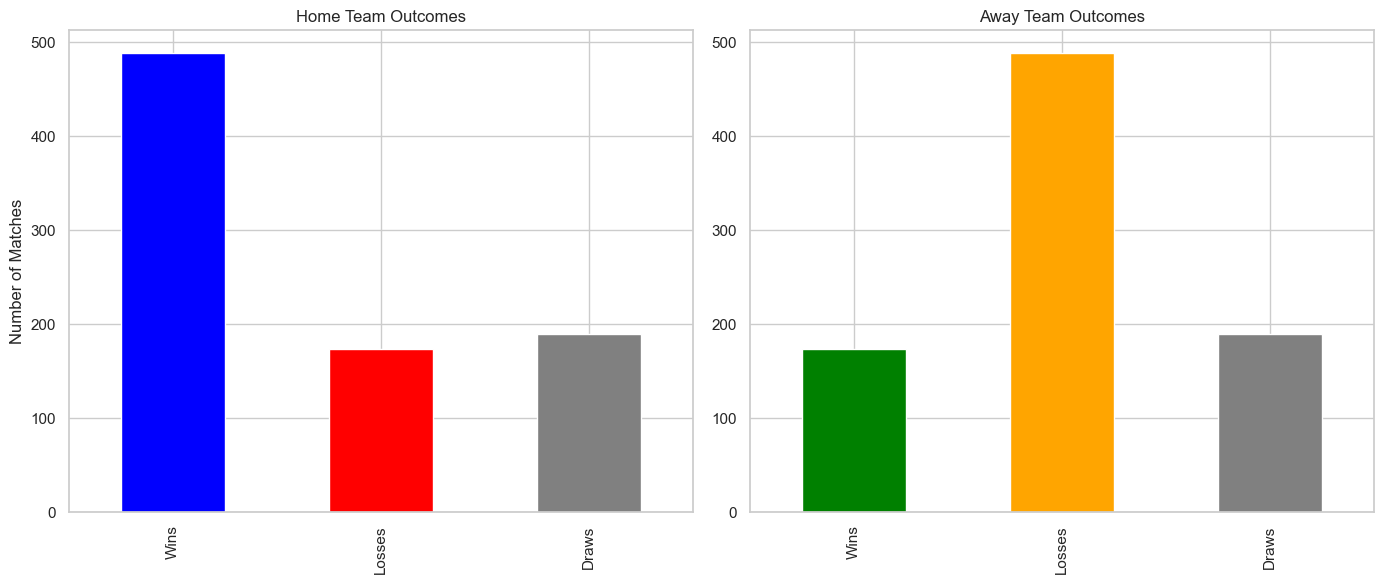

In [63]:

# Visualizing match outcomes for both home and away teams
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Home outcomes
pd.Series(home_outcomes).plot(kind='bar', ax=ax[0], color=['blue', 'red', 'gray'])
ax[0].set_title('Home Team Outcomes')
ax[0].set_ylabel('Number of Matches')
ax[0].grid(True)

# Away outcomes
pd.Series(away_outcomes).plot(kind='bar', ax=ax[1], color=['green', 'orange', 'gray'])
ax[1].set_title('Away Team Outcomes')
ax[1].grid(True)

plt.tight_layout()
plt.show()


In [50]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [51]:
# Count the number of goals scored by each player
goals_per_player = players['Player Name'].value_counts()

In [52]:
# Find the player with the highest goals
top_scorer_player = goals_per_player.idxmax()
top_scorer_player_goals = goals_per_player.max()

print(f"Player with the highest goals: {top_scorer_player} with {top_scorer_player_goals} goals")

Player with the highest goals: RONALDO with 33 goals


In [53]:
# Find the player Who has scored lowest goals
low_scorer_player = goals_per_player.idxmin()
low_scorer_player_goals = goals_per_player.min()
print(f"Player with the lowest goals: {low_scorer_player} with {low_scorer_player_goals} goals")

Player with the lowest goals: Henk VAN SPAANDONCK with 1 goals


In [54]:
worldcups.columns

Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth',
       'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'],
      dtype='object')

In [55]:
winners_list=worldcups['Winner'].value_counts()
winners_list


Winner
Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
England       1
France        1
Spain         1
Germany       1
Name: count, dtype: int64

In [56]:
Runners_up=worldcups['Runners-Up'].value_counts()
Runners_up


Runners-Up
Argentina         3
Germany FR        3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
Sweden            1
Germany           1
France            1
Name: count, dtype: int64

In [57]:
goals_attendance_by_year = worldcups[['Year', 'GoalsScored', 'Country']]
goals_attendance_by_year

,Year,GoalsScored,Country
0,1930,70,Uruguay
1,1934,70,Italy
2,1938,84,France
3,1950,88,Brazil
4,1954,140,Switzerland
5,1958,126,Sweden
6,1962,89,Chile
7,1966,89,England
8,1970,95,Mexico
9,1974,97,Germany


In [58]:
top_countries = worldcups[['Year', 'Winner']].groupby('Winner').size()
top_countries.sort_values(ascending=False)

Winner
Brazil        5
Italy         4
Germany FR    3
Argentina     2
Uruguay       2
England       1
France        1
Germany       1
Spain         1
dtype: int64

In this analysis, Brazil won the match 5 times.

In [62]:
# Analysis Summary:
print("\nSummary of FIFA World Cup Analysis:")
print("===================================")
print(f"Total Matches Analyzed: {matches.shape[0]}")
print(f"Home Win Rate: {home_advantage_rate:.2%}")
print(f"Most Wins by a Country: {win_counts.idxmax()} with {win_counts.max()} titles")
print(f"Country with Most Goals: {total_goals.idxmax()} with {total_goals.max()} goals")



Summary of FIFA World Cup Analysis:
Total Matches Analyzed: 852
Home Win Rate: 57.28%
Most Wins by a Country: Italy with 4 titles
Country with Most Goals: Brazil with 225.0 goals


<h2 style="color:navy">Summary</h2>
1.Missing Data Handling: Visualizes missing values and drops rows with missing years.<br>
2.Goal Statistics: Analyzes and visualizes goal distributions.<br>
3.Attendance: Provides average and total attendance analysis.<br>
4.Home Advantage: Analyzes home advantage by stage and over time.<br>
5.City and Venue Analysis: Analyzes matches played in each city and venue performance.<br>
6.Match Outcomes: Calculates and visualizes match outcomes.<br>
7.Referee Impact: Analyzes the impact of referees on match outcomes.<br>
8.World Cup Titles: Determines the maximum number of World Cup titles and overall goals per country.<br>
10.Player Analysis: Identifies top and lowest scorers.